### Student Information
Name: Lai Shao Hong

Student ID: 41223229L

GitHub ID: shaohong722

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [1]:
### Begin Assignment Here

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
import PAMI
import umap

Dataset = pd.read_csv('./newdataset/Reddit-stock-sentiment.csv')

### **>>> Exercise 1:** Print out data

In [2]:
### Print out data

Dataset.head(3)

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0


In [3]:
print("Dataset.columns: ")
list(Dataset.columns)

Dataset.columns: 


['type',
 'datetime',
 'post_id',
 'subreddit',
 'title',
 'author',
 'url',
 'upvotes',
 'downvotes',
 'upvote_ratio',
 'text',
 'subjectivity',
 'polarity',
 'sentiment',
 'entities',
 'label']

### **>>> Exercise 2:** Query

Goal : Search for the most upvote post

In [4]:
# Check for the type
Dataset['type'].unique()

array(['comment', 'post'], dtype=object)

In [5]:
## Quering the largest upvote
Dataset_post = Dataset[Dataset['type']=='post']
Dataset_post['upvotes'].max()

np.int64(1105)

In [6]:
## getting the index of the largest upvotes post

Index = Dataset_post[Dataset_post['upvotes'] == Dataset_post['upvotes'].max()].index

## The content of the post
print('\n'.join(Dataset_post.loc[Index,'text'].values[0].split('\n')))



> The 10-year Treasury yield climbed 6 basis points to 4.456% Friday Asia hours, as the sell-off in U.S. debt resumed.
> 
> Treasurys have seen a sharp sell-off this week, triggered by U.S. President Donald Trump’s tariff policies, forcing the administration to rethink its strategy and pause new tariffs on most countries.
> 
> The tariff reprieve helped drive a rally in stocks and halted the rise in yields, but the impact has since waned with both the slide in stocks and Treasurys resuming.

Can someone explain to me how we will avoid the same bond situation we were faced with on Wednesday morning? It feels like we're heading towards the same issue


### **>>> Exercise 3:** Category quering

In [7]:
## Identifying types of subreddit

Dataset['subreddit'].unique()

array(['wallstreetbets', 'StockMarket', 'stockstobuytoday', 'stocks'],
      dtype=object)

In [8]:
##querying stocks post

Dataset[(Dataset['subreddit']=='stocks') & (Dataset['type'] == 'post')]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
63,post,2025-03-01 10:00:42,1j0w73o,stocks,Rate My Portfolio - r/Stocks Quarterly Thread ...,AutoModerator,https://www.reddit.com/r/stocks/comments/1j0w7...,79,4.0,0.95,Please use this thread to discuss your portfol...,0.368030,0.176667,1.0,"['Business', 'learn', 'Finviz', '/', 'broker',...",0.0
497,post,2025-04-11 2:58:02,1jwfydk,stocks,U.S. 10-year Treasury yields rise as Trump tar...,Fidler_2K,https://www.reddit.com/r/stocks/comments/1jwfy...,1105,11.0,0.99,\r\n\r\n> The 10-year Treasury yield climbed 6...,0.602273,0.005682,1.0,"['Treasurys', 'Trump', 'someone', 'issue', 'ba...",0.0


### **>>> Exercise 4:** Find Na

In [9]:
import helpers.data_mining_helpers as dmh



In [10]:
Dataset.isnull().apply(lambda x: dmh.check_missing_values(x),axis=1)

0      (The amoung of missing records is: , 2)
1      (The amoung of missing records is: , 2)
2      (The amoung of missing records is: , 2)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 2)
                        ...                   
842    (The amoung of missing records is: , 2)
843    (The amoung of missing records is: , 2)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 2)
846    (The amoung of missing records is: , 2)
Length: 847, dtype: object

### **>>> Exercise 6:** Sampling

In [11]:
Dataset_sampling = Dataset.sample(n=300)

In [12]:
Dataset_sampling.head(3)

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
19,comment,2025-04-11 4:32:16,mmig2h2,stocks,U.S. 10-year Treasury yields rise as Trump tar...,Vanman04,https://www.reddit.com/r/stocks/comments/1jwfy...,12,NaN,NaN,I think we are past the numbers. Just assume f...,0.451956,0.029337,1.0,"['Hell', 'Far', 'stage', 'US', 'economy', 'par...",-1.0
375,comment,2025-04-10 16:52:24,mmezojg,StockMarket,How do you feel about a sitting president maki...,Xerio_the_Herio,https://apnews.com/article/trump-truth-social-...,2,NaN,NaN,Money and power go together... it's sick in th...,0.857143,-0.714286,-1.0,"['context', 'power', 'Money']",-1.0
703,comment,2025-04-10 16:55:58,mmf0ep4,stocks,PRESIDENT TRUMP JUST ASKED THE SUPREME COURT F...,Winter_Ad6784,https://www.reddit.com/r/stocks/comments/1jvzr...,1,NaN,NaN,Trump isn't going after Powell here but this i...,0.500000,0.000000,0.0,"['Powell', 'Trump']",0.0


### **>>> Exercise 7:** Distribution

<Axes: title={'center': 'Subreddit Category distribution'}, xlabel='subreddit'>

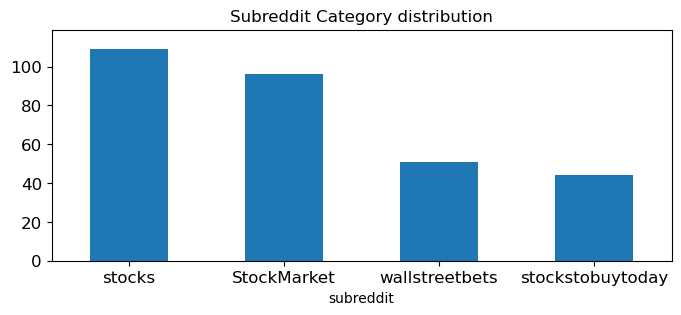

In [13]:
## Distribution of subreddit

Dataset_sampling.subreddit.value_counts().plot(kind = 'bar',
                                           title = 'Subreddit Category distribution',
                                           ylim = [0, Dataset_sampling.subreddit.value_counts().max()+10], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

### **>>> Exercise 8:** Comparing Distribution

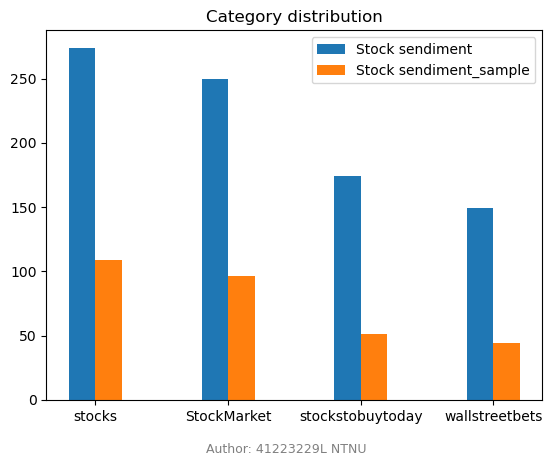

In [14]:
import matplotlib.pyplot as plt

w = 0.2
categories_ = np.arange(len(Dataset['subreddit'].unique()))

fig,ax = plt.subplots()
fig.suptitle("Author: 41223229L NTNU", y=0.02, fontsize=9, color="gray")


ax.bar(categories_ - w/2, Dataset.subreddit.value_counts(), width=w, label='Stock sendiment')
ax.bar(categories_ + w/2, Dataset_sampling.subreddit.value_counts(), width=w, label="Stock sendiment_sample")

ax.set_xticks(categories_)
ax.set_xticklabels(Dataset.subreddit.value_counts().index)
ax.set_title('Category distribution')
ax.legend()

plt.show()

### **>>> Exercise 9:** Feature subset selection

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
Dataset_counts = count_vect.fit_transform(Dataset.text) 

In [16]:
analyze = count_vect.build_analyzer()
analyze(Dataset.text[0])

['calls', 'on', 'retards']

In [17]:
Dataset_counts.shape

(847, 4346)

In [18]:
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '01378', '02', '027', '03', '06', '08', '10', '100'],
      dtype=object)

### **>>> Exercise 10:** Token indexing

In [19]:
Dataset_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [20]:
## Choosing the fourth array
Fourth_records = Dataset_counts[3].toarray()

## Check for the non zero index position
np.nonzero(Fourth_records)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0]),
 array([  18,  175,  195,  196,  197,  320,  327,  404,  406,  486,  560,
         576,  620,  856,  863,  865,  950, 1008, 1054, 1068, 1303, 1306,
        1329, 1388, 1523, 1542, 1604, 1699, 1788, 1837, 1842, 1892, 1894,
        1920, 2024, 2026, 2078, 2117, 2149, 2154, 2161, 2197, 2310, 2316,
        2339, 2397, 2405, 2422, 2560, 2622, 2685, 2687, 2706, 2714, 2796,
        2803, 2871, 2909, 2950, 3014, 3045, 3147, 3263, 3275, 3276, 3313,
        3376, 3436, 3437, 3517, 3585, 3775, 3823, 3824, 3846, 3848, 3849,
        3866, 3907, 3911, 3930, 4066, 4145, 4189, 4190, 4193, 4271, 4293,
        4323, 4335]))

In [21]:
## Get the top 20 token in Fourth array

for i in range(20):
  Index = np.nonzero(Fourth_records)[1][i]
  print(count_vect.get_feature_names_out()[Index:Index+1])

['116']
['about']
['achieved']
['achievement']
['achieves']
['an']
['and']
['astonishing']
['at']
['be']
['blazing']
['boating']
['breaking']
['collaboration']
['combined']
['come']
['contribute']
['creating']
['cutting']
['danfoss']


### >>> **Exercise 11 :** Frequency Visualization

Here， I try to get the top 20 appear terms index and get a glance of the first 20 documents, whether they have top 20 token in the documents

<Axes: >

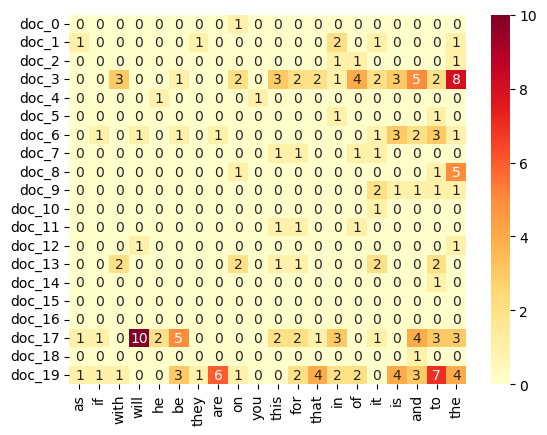

In [22]:
import seaborn as sns

# Getting the top 20 appear terms index
Term = np.array(Dataset_counts.sum(axis=0)).ravel()
Top_20_Term = Term.argsort()[-20:] 

plot_x = [count_vect.get_feature_names_out()[i] for i in Top_20_Term] # Top_20_term index
plot_y = ["doc_" + str(i) for i in range(20)] #First 20 Document
plot_z = Dataset_counts[0:20, Top_20_Term].toarray()

df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)
sns.heatmap(df_todraw, cmap="YlOrRd", annot=True)

### >>> **Exercise 12 :** Visualization

Here , I had done three visualization , the first one are following the Lab1-Master , while the others two are for new data visualization

1. Analysing the first 100 terms frequency, following Lab1-Master.
2. WordCloud
3. Analysing each document number of token

In [23]:
## Counting term_frequencies
term_frequencies = []
for j in range(0,Dataset_counts.shape[1]):
    term_frequencies.append(sum(Dataset_counts[:,j].toarray()))

term_frequencies = np.asarray(Dataset_counts.sum(axis=0))[0]

In [24]:
#Analysing the first 100 Terms frequency

import plotly.express as px

fig = px.bar(x=count_vect.get_feature_names_out()[:300], y=term_frequencies[:300]) 
fig.update_layout(
  xaxis_title="Terms",
  yaxis_title="Frequencies",
  xaxis_range=[0,100], 
  yaxis_range=[1,30],)

fig.show()

Next , I try to filter out the top 5% token since most of them just for gramatically purpose.
I decided to use wordcloud to present the frequency of token

In [25]:
##I have install wordcloud with the code below
#pip install wordcloud

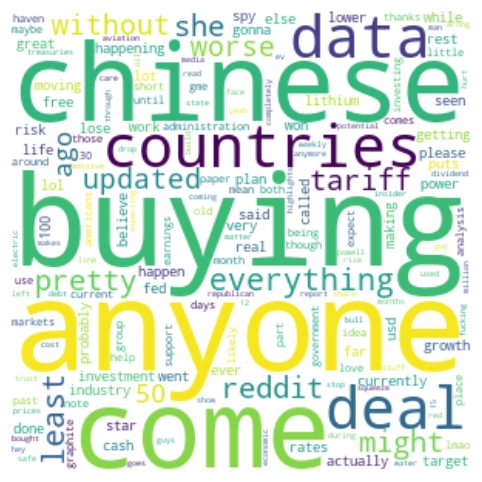

In [26]:
from wordcloud import WordCloud

Terms_Freq = np.array(Dataset_counts.sum(axis=0)).ravel()
Token = count_vect.get_feature_names_out()
Freq_dict = dict(zip(Token, Terms_Freq))

# Sort by frequency
sorted_terms = sorted(Freq_dict.items(), key=lambda x: x[1], reverse=True)

# Remove top 5% most frequent words
Filter_95 = int(len(sorted_terms) * 0.05)
Filter_Terms = dict(sorted_terms[Filter_95:])

#Plotting WordCLoud
wc = WordCloud(width=300, height=300, background_color="white").generate_from_frequencies(Filter_Terms)
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

Next, I want to calculate the number of token per Document , and find the mean number of token per document.

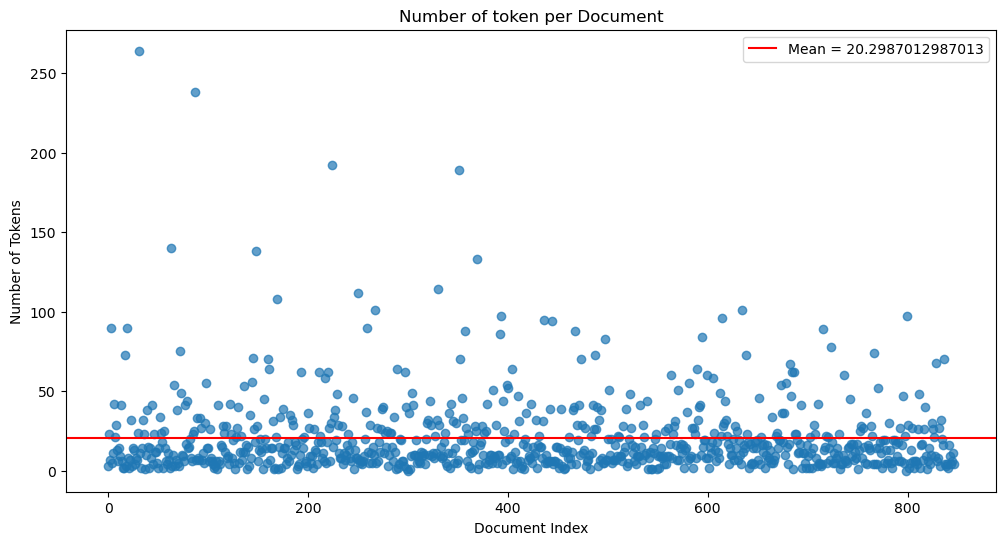

In [27]:
#Calculating number of token in each dataset
Number_of_Token = np.asarray((Dataset_counts > 0).sum(axis=1)).ravel()

# Calculate mean
Mean = np.mean(Number_of_Token)

plt.figure(figsize=(12,6))
plt.scatter(range(len(Number_of_Token)), Number_of_Token, alpha=0.7)
plt.axhline(y=Mean, color="red", label=f"Mean = {Mean}")
plt.xlabel("Document Index")
plt.ylabel("Number of Tokens")
plt.title("Number of token per Document")
plt.legend()
plt.show()

Graph above hasn't exclude some very high number of token per document, this will cause bias in calculating mean.
Thus, I try to remove some of the document that has very high number of token.

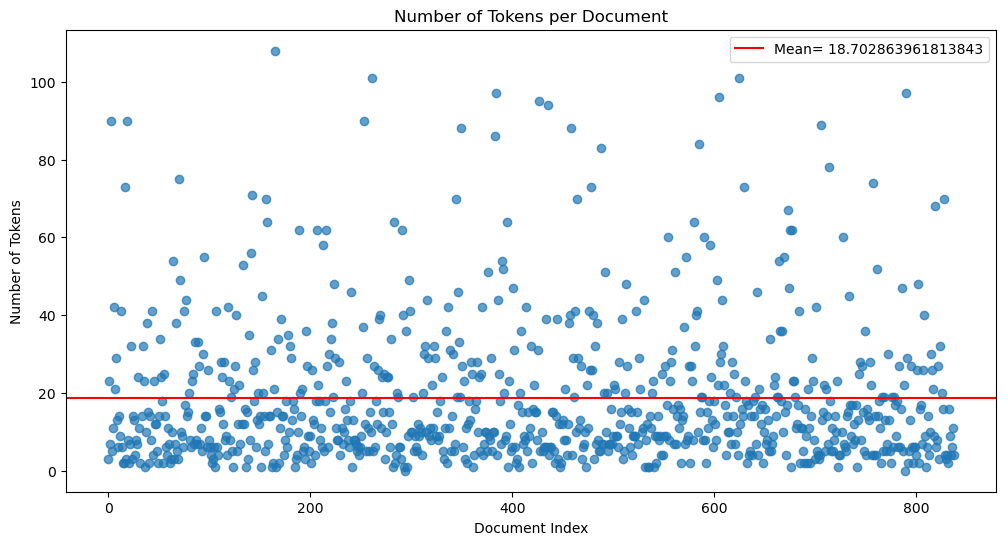

In [28]:
Number_of_Token_2 = np.asarray((Dataset_counts > 0).sum(axis=1)).ravel()

#Filter out the top 1% number of document
Top_99_Document = np.percentile(Number_of_Token_2, 99)
Top_99_tokens = Number_of_Token_2[Number_of_Token_2 <= Top_99_Document]

# Calculating mean
Mean_2 = np.mean(Top_99_tokens)

plt.figure(figsize=(12,6))
plt.scatter(range(len(Top_99_tokens)), Top_99_tokens, alpha=0.7)
plt.axhline(y=Mean_2, color="red", label=f"Mean= {Mean_2}")
plt.xlabel("Document Index")
plt.ylabel("Number of Tokens")
plt.title("Number of Tokens per Document")
plt.legend()
plt.show()

### >>> **Exercise 14 :** Long tail

In [29]:
top_idx = np.argsort(term_frequencies)[::-1][:100]

top_terms = count_vect.get_feature_names_out()[top_idx]
top_freqs = term_frequencies[top_idx]

fig = px.bar(x=top_terms, y=top_freqs)
fig.update_layout(
    xaxis_title="Terms",
    yaxis_title="Frequencies",
)

fig.show()

### >>> **Exercise 15:** Log Distribution

In [30]:
# Answer here

term_frequencies_log = np.log1p(term_frequencies)

# get top 100 terms
top_idx = np.argsort(term_frequencies_log)[::-1][:100]

top_terms = count_vect.get_feature_names_out()[top_idx]
top_freqs = term_frequencies_log[top_idx]

# plot
fig = px.bar(x=top_terms, y=top_freqs)
fig.update_layout(
    xaxis_title="Terms",
    yaxis_title="Log(Frequencies)"
)

fig.show()

# Phase 2

For this dataset, I am going to try to categorized each reddit based on different subreddit. 

### Finding Frequent Patterns

In [31]:
#Create separate DataFrames for each category
categories = Dataset['subreddit'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = Dataset[Dataset['subreddit'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['title'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [32]:
category_number=3 #Changes from 0 to 3
print(f"Filtered Term-Document Frequency DataFrame for SubredditS {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for SubredditS stocks:


,10,11,125,1952,2008,2025,and,apr,are,as,...,trading,treasuries,treasury,trump,us,very,warning,will,year,yields
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,1,1
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
270,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
272,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


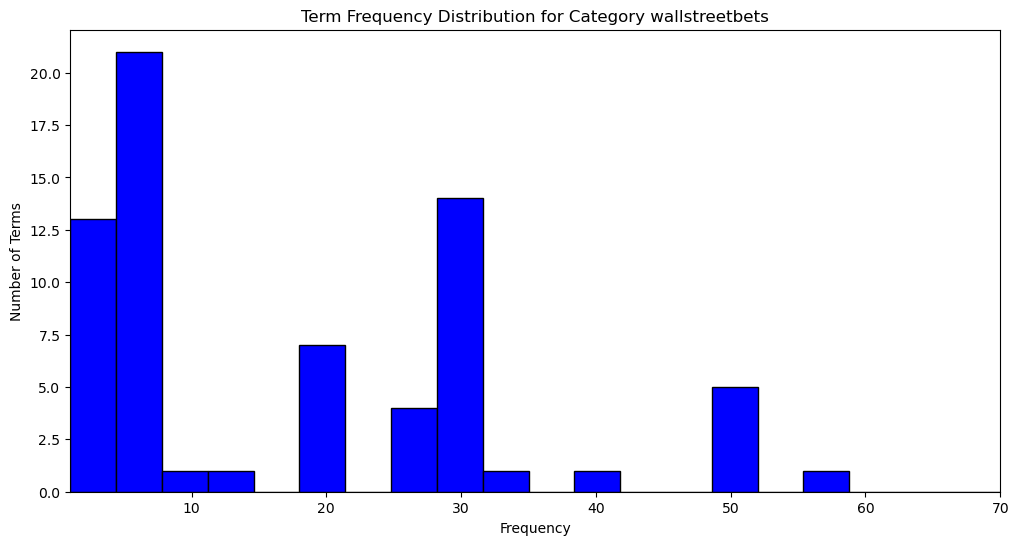

In [33]:
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(12, 6))
plt.hist(word_counts, bins=30, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 70)
plt.show()

In [36]:
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.05 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: wallstreetbets
Number of terms in bottom 1%: 3
Filtered terms: ['300', '75k', 'gains']


In [38]:
category_number=3 #You can change it from 0 to 3

# Filter the bottom 1% and top 1% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.01, bottom_percent=0.05):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 1% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]



For category wallstreetbets we filter the following words:
Bottom 5.0% words: 
300      1
75k      1
gains    1
dtype: int64
Top 1.0% words: 
Series([], dtype: int64)

For category StockMarket we filter the following words:
Bottom 5.0% words: 
11            1
advice        1
discussion    1
daily         1
dtype: int64
Top 1.0% words: 
Series([], dtype: int64)

For category stockstobuytoday we filter the following words:
Bottom 5.0% words: 
amc             1
anix            1
another         1
anybody         1
apls            1
artw            1
available       1
avoiding        1
acceleration    1
acquisition     1
advantage       1
advantages      1
advice          1
ahro            1
ai              1
alternus        1
one             1
onemednet       1
or              1
otc             1
page            1
pan             1
dtype: int64
Top 1.0% words: 
technical    19
thread       20
analysis     22
the          26
dtype: int64

For category stocks we filter the following words:

,10,11,125,1952,2008,2025,apr,are,as,asked,...,trading,treasuries,treasury,trump,us,very,warning,will,year,yields
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,1
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
270,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
272,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
print(f'\nFor category {category} we filter the following words:')
term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs['wallstreetbets'])


For category stocks we filter the following words:
Bottom 5.0% words: 
300      1
75k      1
gains    1
dtype: int64
Top 1.0% words: 
Series([], dtype: int64)


### Pattern Above Minimum Threshold

In [40]:
from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = DF2DB(term_document_dfs[category])           
        
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)


Database size (total no of transactions) : 250
Number of items : 81
Minimum Transaction Size : 3
Average Transaction Size : 12.044
Maximum Transaction Size : 23
Standard Deviation Transaction Size : 6.477195689494026
Variance in Transaction Sizes : 42.12255421686747
Sparsity : 0.8513086419753086


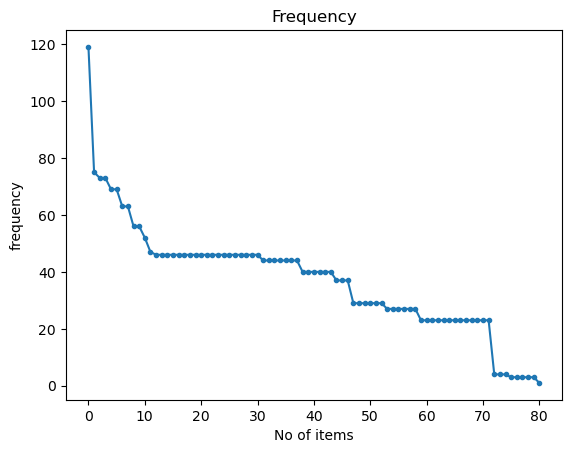

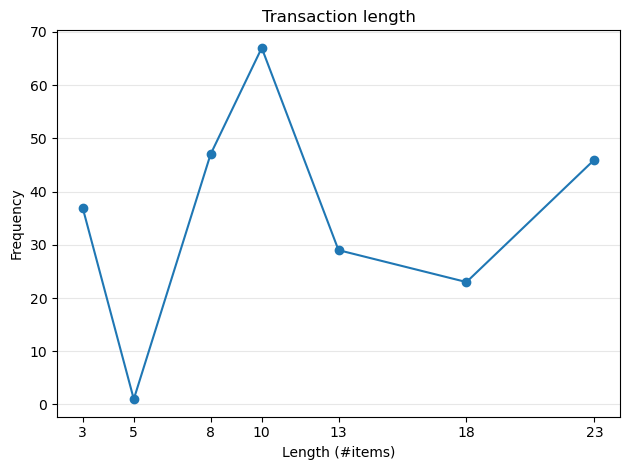

In [41]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_StockMarket.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [78]:
from PAMI.frequentPattern.basic import FPGrowth as alg

minSup=50
obj1 = alg.FPGrowth(iFile='td_freq_db_StockMarket.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_StockMarket= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_StockMarket))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

obj1.save('freq_patterns_StockMarket_minSup5.txt') #save the patterns
frequentPatternsDF_StockMarket

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 21
Runtime: 0.0034027099609375


,Patterns,Support
0,all,52
1,all\ttrump,52
2,on,56
3,on\ttrump,56
4,tariff,56
5,tariff\ttrump,56
6,tariff\ton,56
7,trump\ttariff\ton,56
8,is,63
9,is\ttrump,63


Database size (total no of transactions) : 149
Number of items : 69
Minimum Transaction Size : 2
Average Transaction Size : 9.59731543624161
Maximum Transaction Size : 16
Standard Deviation Transaction Size : 3.79317554465655
Variance in Transaction Sizes : 14.48539814982768
Sparsity : 0.8609084719385274


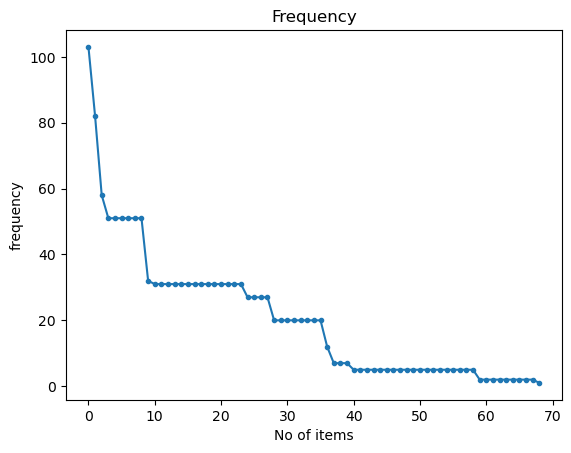

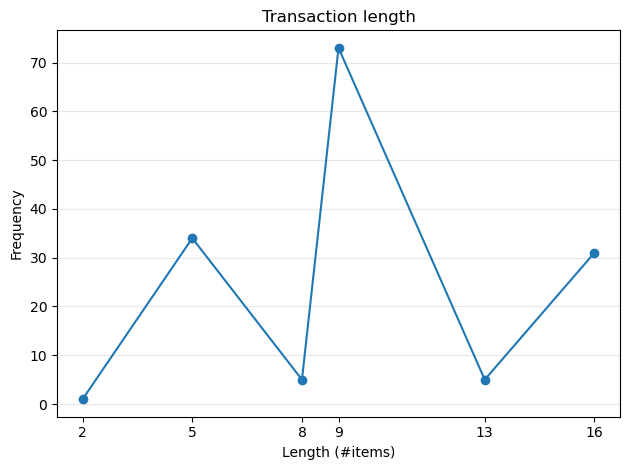

In [43]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_stocks.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [66]:
minSup=40
obj2 = alg.FPGrowth(iFile='td_freq_db_stocks.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_stocks= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_stocks))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 511
Runtime: 0.0022704601287841797


In [67]:
obj2.save('freq_patterns_stocks_minSup5.txt') #save the patterns
frequentPatternsDF_stocks

,Patterns,Support
0,11,51
1,the\t11,51
2,for\t11,51
3,thread\t11,51
4,the\tfor\t11,51
...,...,...
506,thread\tfor,51
507,the\tthread\tfor,51
508,for,82
509,for\tthe,51


Database size (total no of transactions) : 155
Number of items : 421
Minimum Transaction Size : 1
Average Transaction Size : 5.580645161290323
Maximum Transaction Size : 38
Standard Deviation Transaction Size : 4.278786333411931
Variance in Transaction Sizes : 18.4268956849602
Sparsity : 0.9867443107807831


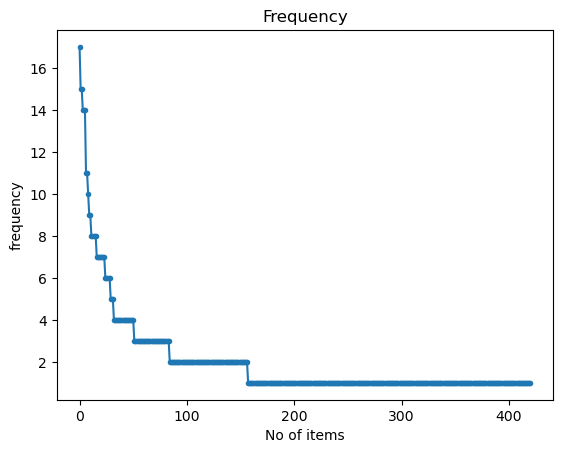

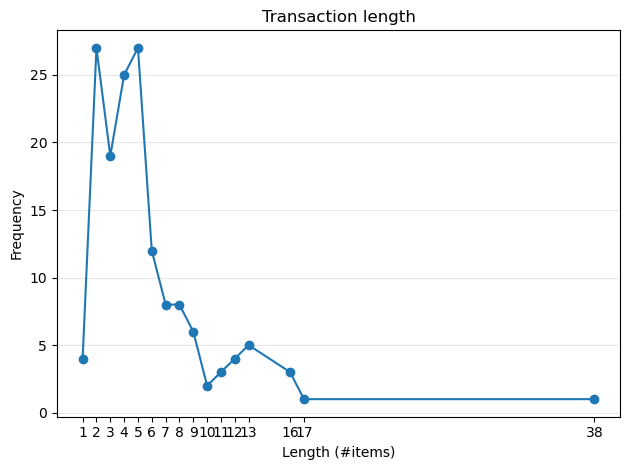

In [68]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_stockstobuytoday.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [69]:
minSup=5
obj3 = alg.FPGrowth(iFile='td_freq_db_stockstobuytoday.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_stockstobuytoday= obj3.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_stockstobuytoday))) #print the total number of patterns
print('Runtime: ' + str(obj3.getRuntime())) #measure the runtime

obj3.save('freq_patterns_stockstobuytoday_minSup5.txt') #save the patterns
frequentPatternsDF_stockstobuytoday

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 44
Runtime: 0.0017514228820800781


,Patterns,Support
0,new,5
1,short,5
2,coinbase,5
3,crypto\tcoinbase,5
4,gainers\tcoinbase,5
5,crypto\tgainers\tcoinbase,5
6,under,6
7,under\tany,6
8,shorts,6
9,it,6


Database size (total no of transactions) : 149
Number of items : 69
Minimum Transaction Size : 2
Average Transaction Size : 9.59731543624161
Maximum Transaction Size : 16
Standard Deviation Transaction Size : 3.79317554465655
Variance in Transaction Sizes : 14.48539814982768
Sparsity : 0.8609084719385274


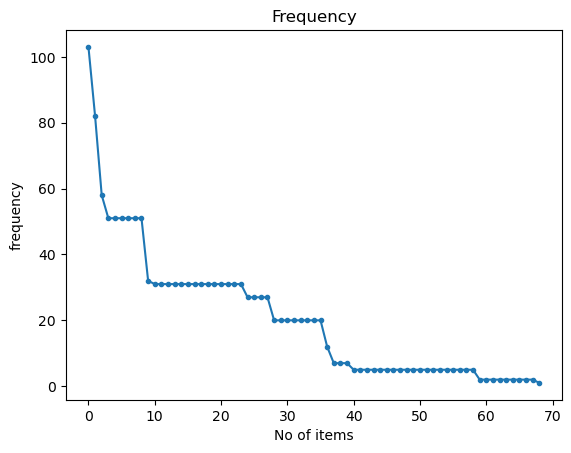

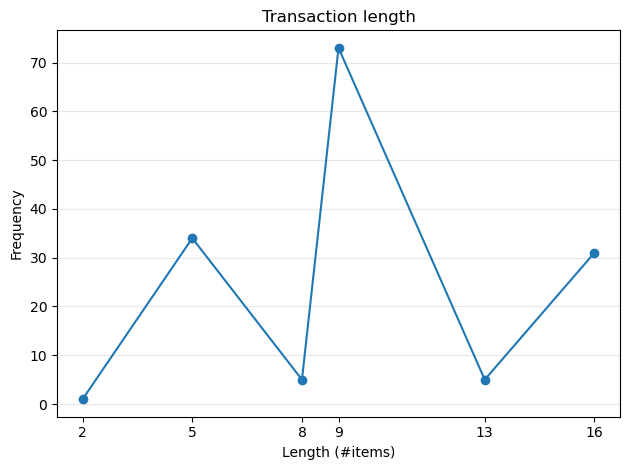

In [70]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_wallstreetbets.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [71]:
minSup=50
obj4 = alg.FPGrowth(iFile='td_freq_db_wallstreetbets.csv', minSup=minSup)
obj4.mine()
frequentPatternsDF_wallstreetbets= obj4.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_wallstreetbets))) #print the total number of patterns
print('Runtime: ' + str(obj4.getRuntime())) #measure the runtime

obj4.save('freq_patterns_wallstreetbets_minSup5.txt') #save the patterns
frequentPatternsDF_wallstreetbets

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 511
Runtime: 0.0019474029541015625


,Patterns,Support
0,11,51
1,the\t11,51
2,for\t11,51
3,thread\t11,51
4,the\tfor\t11,51
...,...,...
506,thread\tfor,51
507,the\tthread\tfor,51
508,for,82
509,for\tthe,51


In [79]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_stocks, frequentPatternsDF_stockstobuytoday, frequentPatternsDF_wallstreetbets, frequentPatternsDF_StockMarket]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

                     Patterns  Support
53                      trump      119
51                     policy       73
52                      china       73
49                        his       69
50                  to\ttrump       69
46                 the\ttrump       63
48             trump\tthe\tis       63
45                  is\ttrump       63
47                    the\tis       63
41                     tariff       56
44          trump\ttariff\ton       56
43                 tariff\ton       56
42              tariff\ttrump       56
40                  on\ttrump       56
39                 all\ttrump       52
38                        all       52
37                      stock       17
35                     stocks       15
36                     anyone       15
33           stockstobuytoday       14
34   lounge\tstockstobuytoday       14
32                     lounge       14
31                       data       11
28                       into        9
30                     ma

In [80]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(Dataset['title'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
Dataset['tokenized_text'] = Dataset['title'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=Dataset.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = Dataset['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=Dataset.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,000,04,08,10,100k,10k,11,12,125,14,...,into\tanyone,looking\tanyone,gainers\tcrypto,any\tstock,new,short,coinbase,crypto\tcoinbase,gainers\tcoinbase,crypto\tgainers\tcoinbase
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Exercise 17: MaxFPGrowth & FAE Top-K

In [81]:
#FAE Top-K , value = 100,150
from PAMI.frequentPattern.topk import FAE as alg_FAE
k=100
obj_FAE = alg_FAE.FAE(iFile='td_freq_db_stockstobuytoday.csv', k=k)
obj_FAE.mine()
frequentPatternsDF_stockstobuytoday_FAE= obj_FAE.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_stockstobuytoday_FAE))) #print the total number of patterns
print('Runtime: ' + str(obj_FAE.getRuntime())) #measure the runtime

frequentPatternsDF_stockstobuytoday_FAE.head(5)

 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 100
Runtime: 0.011501073837280273


,Patterns,Support
0,stock,17
1,stocks,15
2,anyone,15
3,lounge,14
4,stockstobuytoday,14


In [82]:
k=150
obj_FAE = alg_FAE.FAE(iFile='td_freq_db_stockstobuytoday.csv', k=k)
obj_FAE.mine()
frequentPatternsDF_stockstobuytoday_FAE= obj_FAE.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_stockstobuytoday_FAE))) #print the total number of patterns
print('Runtime: ' + str(obj_FAE.getRuntime())) #measure the runtime

frequentPatternsDF_stockstobuytoday_FAE.head(5)

 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 150
Runtime: 0.016425609588623047


,Patterns,Support
0,stock,17
1,stocks,15
2,anyone,15
3,lounge,14
4,stockstobuytoday,14


In [83]:
#MaxFP , minimum threshold =1,2,3
from PAMI.frequentPattern.maximal import MaxFPGrowth as MAX_FP

minSup=1
obj_MAX = MAX_FP.MaxFPGrowth(iFile='td_freq_db_stockstobuytoday.csv', minSup=minSup)
obj_MAX.mine()
frequentPatternsDF_stockstobuytoday_Max= obj_MAX.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_stockstobuytoday_Max))) #print the total number of patterns
print('Runtime: ' + str(obj_MAX.getRuntime())) #measure the runtime

frequentPatternsDF_stockstobuytoday_Max.head(5)

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 92
Runtime: 0.03853034973144531


,Patterns,Support
0,it today hope killed marin mrin software someo...,1
1,anyone mining o3 placement private see,1
2,data dmac release soon,1
3,stock to of on what any buy this sdc at shares...,1
4,stock for old conversion deal hertz holders ht...,1


In [84]:
minSup=2
obj_MAX = MAX_FP.MaxFPGrowth(iFile='td_freq_db_stockstobuytoday.csv', minSup=minSup)
obj_MAX.mine()
frequentPatternsDF_stockstobuytoday_Max= obj_MAX.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_stockstobuytoday_Max))) #print the total number of patterns
print('Runtime: ' + str(obj_MAX.getRuntime())) #measure the runtime

frequentPatternsDF_stockstobuytoday_Max.head(5)

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 70
Runtime: 0.007477998733520508


,Patterns,Support
0,just,2
1,days,2
2,shorts aka naked securities threshold,2
3,dividend value deep vs,2
4,watchlist,2


In [85]:
minSup=3
obj_MAX = MAX_FP.MaxFPGrowth(iFile='td_freq_db_stockstobuytoday.csv', minSup=minSup)
obj_MAX.mine()
frequentPatternsDF_stockstobuytoday_Max= obj_MAX.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_stockstobuytoday_Max))) #print the total number of patterns
print('Runtime: ' + str(obj_MAX.getRuntime())) #measure the runtime

frequentPatternsDF_stockstobuytoday_Max.head(5)

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 50
Runtime: 0.003143787384033203


,Patterns,Support
0,to new trading,3
1,analyst recommendations,3
2,undervalued,3
3,dividend value,3
4,to in good,3


### Term Frequency Inverse Document Frequency (TF-IDF)

小筆記：

TF-IDF 是把「一個詞在文件裡有多常見（TF）」跟「這個詞在整個文件集裡有多稀有（IDF）」結合起來的權重，用來衡量一個詞對某份文件的重要程度。直覺：在某篇文章裡常出現、但在其他文章少見的詞，分數就高；像「的、and」這種到處都有的詞，分數就低。

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_IDF= vectorizer.fit_transform(Dataset['title'])  # X['text'] contains your text data
terms = vectorizer.get_feature_names_out()


In [87]:
print(X_IDF.shape)

(847, 601)


In [88]:
# Tokenize the sentences into sets of unique words
Dataset['tokenized_text'] = Dataset['title'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=Dataset.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = Dataset['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_IDF = pd.DataFrame(X_IDF.toarray(), columns=terms, index=Dataset.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_IDF = pd.concat([tdm_IDF, pattern_matrix], axis=1)

augmented_IDF

,000,04,08,10,100k,10k,11,12,125,14,...,into\tanyone,looking\tanyone,gainers\tcrypto,any\tstock,new,short,coinbase,crypto\tcoinbase,gainers\tcoinbase,crypto\tgainers\tcoinbase
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.224309,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
843,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
844,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
845,0.0,0.0,0.0,0.000000,0.0,0.0,0.271221,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


---

## Dimensionality Reduction

In [89]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

c:\Users\laish\anaconda3\envs\dm2025lab\Lib\site-packages\threadpoolctl.py:1226: RuntimeWarning:


Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md




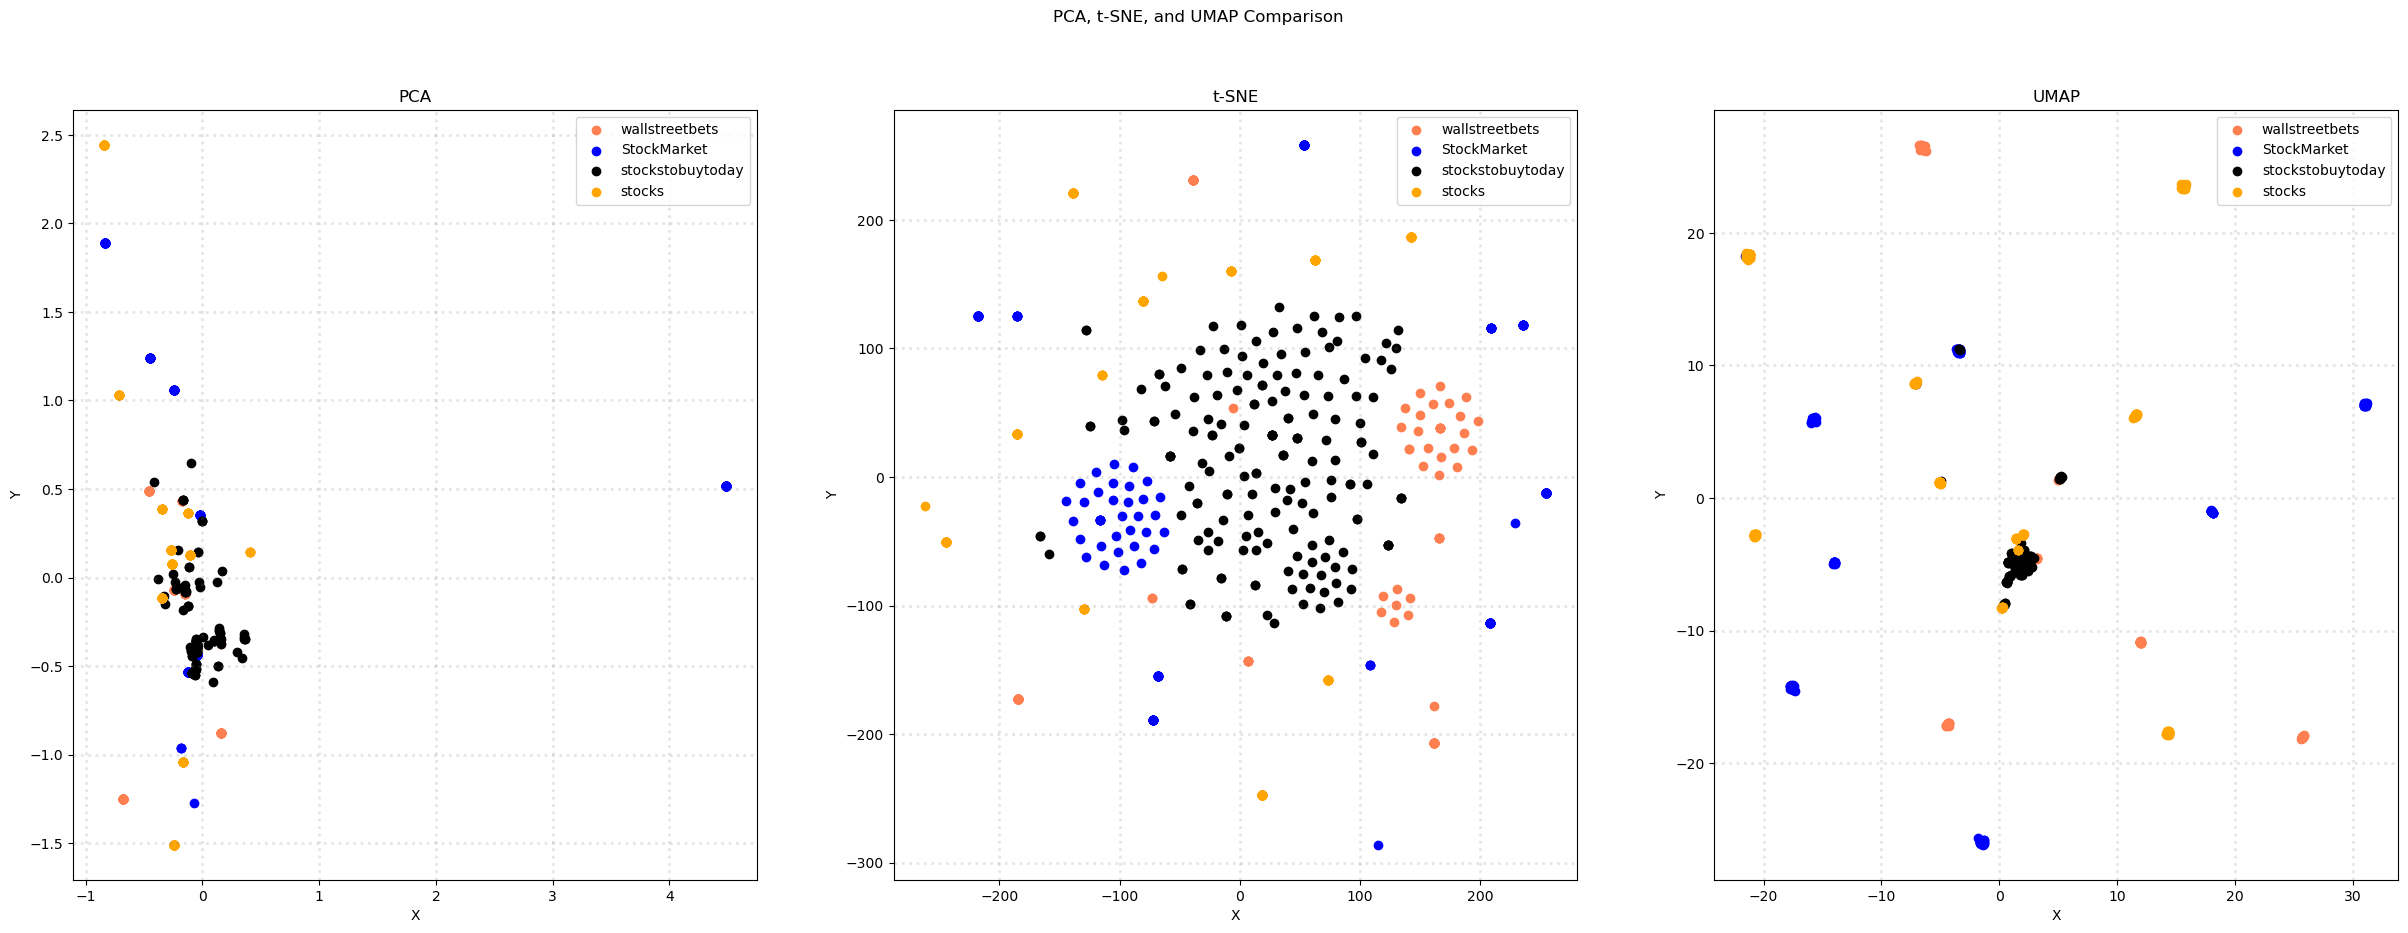

In [90]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = Dataset['subreddit'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[Dataset['subreddit'] == category].T[0]
        ys = X_reduced[Dataset['subreddit'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

In [91]:
#Answer Here

X_pca_aug_3 = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_aug_3 = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_aug_3 = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

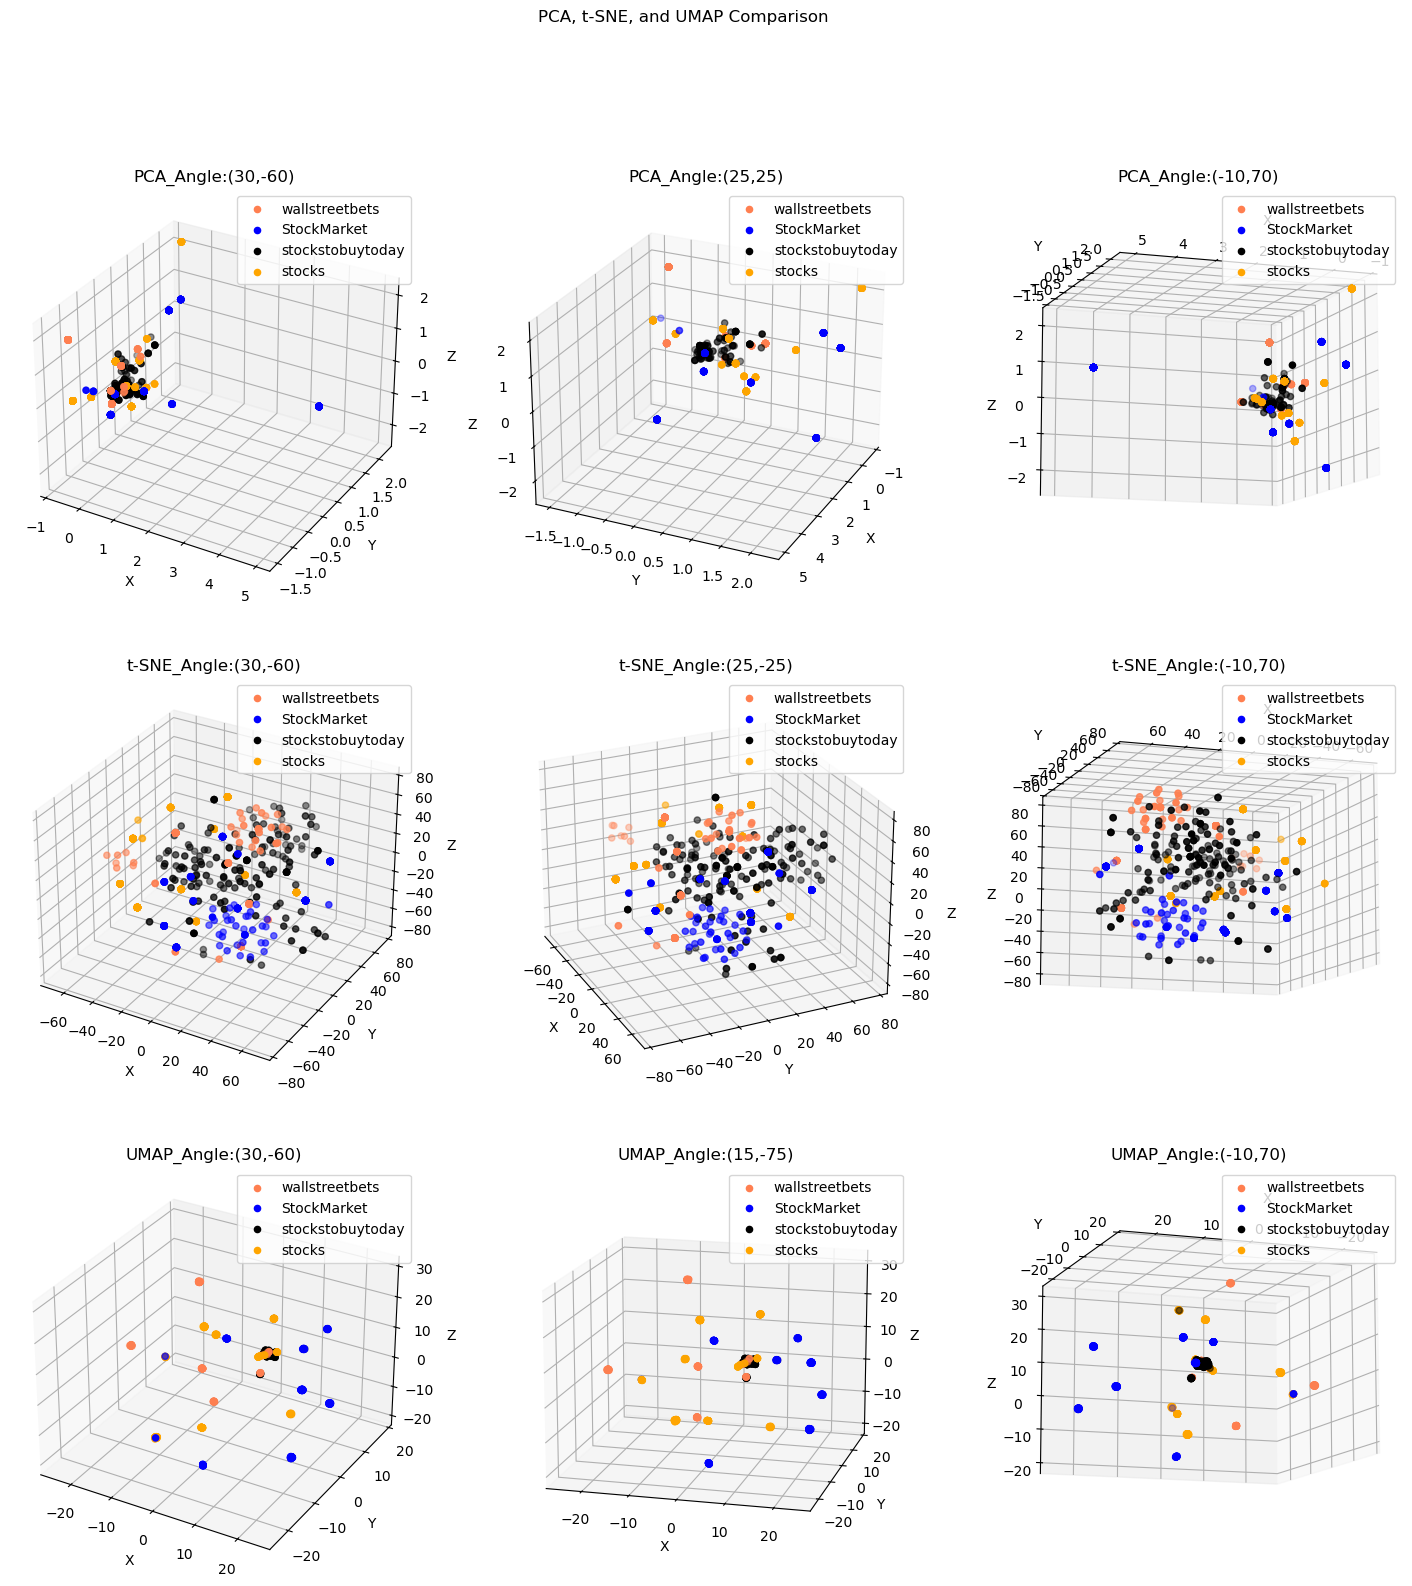

In [92]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = Dataset['subreddit'].unique() 

fig = plt.figure(figsize=(18, 18))
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

ax1 = fig.add_subplot(331, projection='3d')
ax2 = fig.add_subplot(332, projection='3d')
ax3 = fig.add_subplot(333, projection='3d')
ax4 = fig.add_subplot(334, projection='3d')
ax5 = fig.add_subplot(335, projection='3d')
ax6 = fig.add_subplot(336, projection='3d')
ax7 = fig.add_subplot(337, projection='3d')
ax8 = fig.add_subplot(338, projection='3d')
ax9 = fig.add_subplot(339, projection='3d')



# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title,elev,azim):
    for c, category in zip(col, categories):
        xs = X_reduced[Dataset['subreddit'] == category].T[0]
        ys = X_reduced[Dataset['subreddit'] == category].T[1]
        zs = X_reduced[Dataset['subreddit'] == category].T[2]
        ax.scatter(xs, ys,zs, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(f'{title}_Angle:({elev},{azim})')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.view_init(elev=elev,azim=azim)
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(ax1, X_pca_aug_3, 'PCA',30,-60)
plot_scatter(ax2, X_pca_aug_3, 'PCA',25,25)
plot_scatter(ax3, X_pca_aug_3, 'PCA',-10,70)
plot_scatter(ax4, X_tsne_aug_3, 't-SNE',30,-60)
plot_scatter(ax5, X_tsne_aug_3, 't-SNE',25,-25)
plot_scatter(ax6, X_tsne_aug_3, 't-SNE',-10,70)
plot_scatter(ax7, X_umap_aug_3, 'UMAP',30,-60)
plot_scatter(ax8, X_umap_aug_3, 'UMAP',15,-75)
plot_scatter(ax9, X_umap_aug_3, 'UMAP',-10,70)

plt.show()

In [93]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [94]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(Dataset.subreddit)

,neg_label,0
,pos_label,1
,sparse_output,False


In [95]:
Dataset['bin_category'] = mlb.transform(Dataset['subreddit']).tolist()

## Data Exploration

In [96]:
document_to_transform_1 = []
random_record_1 = Dataset.iloc[10]
random_record_1 = random_record_1['title']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = Dataset.iloc[100]
random_record_2 = random_record_2['title']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = Dataset.iloc[150]
random_record_3 = random_record_3['title']
document_to_transform_3.append(random_record_3)

In [97]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['r/Stocks Daily Discussion & Fundamentals Friday Apr 11, 2025']
['The Trump administration is begging Xi Jinping to call Trump quickly.']
['Rate My Portfolio - r/Stocks Quarterly Thread March 2025']


In [98]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

In [99]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.250000
Cosine Similarity using count bw 2 and 3: 0.000000


C:\Users\laish\AppData\Local\Temp\ipykernel_16508\2841806267.py:9: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\laish\AppData\Local\Temp\ipykernel_16508\2841806267.py:10: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\laish\AppData\Local\Temp\ipykernel_16508\2841806267.py:11: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



In [100]:
'''Results above, we could clearly sees that document 1 ,2, and 3 are clearly distinct from each other as cosine similarity are nearly zero'''

'Results above, we could clearly sees that document 1 ,2, and 3 are clearly distinct from each other as cosine similarity are nearly zero'

---

## Data Classification

#### Multinomial Bayes Classification

In [101]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

In [102]:
#1.Model with only the document-term frequency data

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, Dataset['subreddit'], test_size=0.3, random_state=42)

# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))

Accuracy: 0.984313725490196

Classification Report:
                   precision    recall  f1-score   support

     StockMarket     1.0000    0.9861    0.9930        72
          stocks     0.9775    1.0000    0.9886        87
stockstobuytoday     1.0000    0.9388    0.9684        49
  wallstreetbets     0.9592    1.0000    0.9792        47

        accuracy                         0.9843       255
       macro avg     0.9842    0.9812    0.9823       255
    weighted avg     0.9848    0.9843    0.9842       255



In [103]:
#2. Model with augmented data which pattern above minimum support

Aug_X_train, Aug_X_test, Aug_y_train, Aug_y_test = train_test_split(augmented_df, Dataset['subreddit'], test_size=0.3, random_state=42)

# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(Aug_X_train, Aug_y_train)

# Make predictions on the test set
Aug_y_pred = nb_classifier.predict(Aug_X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(Aug_y_test, Aug_y_pred))
print("\nClassification Report:\n", classification_report(Aug_y_test, Aug_y_pred, digits=4))

Accuracy: 0.984313725490196

Classification Report:
                   precision    recall  f1-score   support

     StockMarket     1.0000    0.9861    0.9930        72
          stocks     0.9775    1.0000    0.9886        87
stockstobuytoday     1.0000    0.9388    0.9684        49
  wallstreetbets     0.9592    1.0000    0.9792        47

        accuracy                         0.9843       255
       macro avg     0.9842    0.9812    0.9823       255
    weighted avg     0.9848    0.9843    0.9842       255



In [104]:
#3. Model with TF-IDF data

X_train, X_test, y_train, y_test = train_test_split(tdm_IDF, Dataset['subreddit'], test_size=0.3, random_state=42)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))

Accuracy: 0.9686274509803922

Classification Report:
                   precision    recall  f1-score   support

     StockMarket     0.9595    0.9861    0.9726        72
          stocks     0.9667    1.0000    0.9831        87
stockstobuytoday     1.0000    0.8571    0.9231        49
  wallstreetbets     0.9592    1.0000    0.9792        47

        accuracy                         0.9686       255
       macro avg     0.9713    0.9608    0.9645       255
    weighted avg     0.9697    0.9686    0.9679       255



---

### Bernoulli Naive Bayes and Gaussian Naive Bayes

小筆記：
- Bernoulli 只在乎文件裏面是否有這個詞
- Multinomial 在乎文件裏詞匯出現的次數
- Gaussian 離平均越近、分數越高；離越遠、分數指數級下降

In [105]:
# Gaussian Naive Bayes
# Frequency Feature Dataframe

from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(tdm_df, Dataset['subreddit'], test_size=0.3, random_state=42)

# Train the Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))

Accuracy: 0.9803921568627451

Classification Report:
                   precision    recall  f1-score   support

     StockMarket     0.9863    1.0000    0.9931        72
          stocks     1.0000    1.0000    1.0000        87
stockstobuytoday     1.0000    0.8980    0.9462        49
  wallstreetbets     0.9216    1.0000    0.9592        47

        accuracy                         0.9804       255
       macro avg     0.9770    0.9745    0.9746       255
    weighted avg     0.9817    0.9804    0.9802       255



In [109]:
# Gaussian Naive Bayes
# Augmented frequency pattern

Aug_X_train, Aug_X_test, Aug_y_train, Aug_y_test = train_test_split(augmented_df, Dataset['subreddit'], test_size=0.3, random_state=42)

# Train the Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(Aug_X_train, Aug_y_train)

# Make predictions on the test set
Aug_y_pred = nb_classifier.predict(Aug_X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(Aug_y_test, Aug_y_pred))
print("\nClassification Report:\n", classification_report(Aug_y_test, Aug_y_pred, digits=4))

Accuracy: 0.9803921568627451

Classification Report:
                   precision    recall  f1-score   support

     StockMarket     0.9863    1.0000    0.9931        72
          stocks     1.0000    1.0000    1.0000        87
stockstobuytoday     1.0000    0.8980    0.9462        49
  wallstreetbets     0.9216    1.0000    0.9592        47

        accuracy                         0.9804       255
       macro avg     0.9770    0.9745    0.9746       255
    weighted avg     0.9817    0.9804    0.9802       255



In [110]:
# Gaussian Naive Bayes
# TF-IDF dataset

X_train, X_test, y_train, y_test = train_test_split(tdm_IDF, Dataset['subreddit'], test_size=0.3, random_state=42)

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))

Accuracy: 0.9882352941176471

Classification Report:
                   precision    recall  f1-score   support

     StockMarket     1.0000    1.0000    1.0000        72
          stocks     1.0000    1.0000    1.0000        87
stockstobuytoday     1.0000    0.9388    0.9684        49
  wallstreetbets     0.9400    1.0000    0.9691        47

        accuracy                         0.9882       255
       macro avg     0.9850    0.9847    0.9844       255
    weighted avg     0.9889    0.9882    0.9882       255



In [111]:
# Bernoulli Naive Bayes
# Frequency Feature Dataframe

from sklearn.naive_bayes import BernoulliNB

X_train, X_test, y_train, y_test = train_test_split(tdm_df, Dataset['subreddit'], test_size=0.3, random_state=42)

# Train the Naive Bayes classifier
nb_classifier = BernoulliNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))

Accuracy: 0.9921568627450981

Classification Report:
                   precision    recall  f1-score   support

     StockMarket     1.0000    0.9861    0.9930        72
          stocks     0.9886    1.0000    0.9943        87
stockstobuytoday     1.0000    0.9796    0.9897        49
  wallstreetbets     0.9792    1.0000    0.9895        47

        accuracy                         0.9922       255
       macro avg     0.9920    0.9914    0.9916       255
    weighted avg     0.9923    0.9922    0.9922       255



In [112]:
# Bernoulli Naive Bayes
# Augmented frequency pattern

Aug_X_train, Aug_X_test, Aug_y_train, Aug_y_test = train_test_split(augmented_df, Dataset['subreddit'], test_size=0.3, random_state=42)

# Train the Naive Bayes classifier
nb_classifier = BernoulliNB()
nb_classifier.fit(Aug_X_train, Aug_y_train)

# Make predictions on the test set
Aug_y_pred = nb_classifier.predict(Aug_X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(Aug_y_test, Aug_y_pred))
print("\nClassification Report:\n", classification_report(Aug_y_test, Aug_y_pred, digits=4))

Accuracy: 0.9882352941176471

Classification Report:
                   precision    recall  f1-score   support

     StockMarket     1.0000    0.9861    0.9930        72
          stocks     0.9886    1.0000    0.9943        87
stockstobuytoday     1.0000    0.9592    0.9792        49
  wallstreetbets     0.9592    1.0000    0.9792        47

        accuracy                         0.9882       255
       macro avg     0.9870    0.9863    0.9864       255
    weighted avg     0.9886    0.9882    0.9882       255



In [113]:
# Bernoulli Naive Bayes
# TF-IDF dataset

X_train, X_test, y_train, y_test = train_test_split(tdm_IDF, Dataset['subreddit'], test_size=0.3, random_state=42)

nb_classifier = BernoulliNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))

Accuracy: 0.9921568627450981

Classification Report:
                   precision    recall  f1-score   support

     StockMarket     1.0000    0.9861    0.9930        72
          stocks     0.9886    1.0000    0.9943        87
stockstobuytoday     1.0000    0.9796    0.9897        49
  wallstreetbets     0.9792    1.0000    0.9895        47

        accuracy                         0.9922       255
       macro avg     0.9920    0.9914    0.9916       255
    weighted avg     0.9923    0.9922    0.9922       255



In [ ]:
print('''
For this exercise,I try out Multinomial Naive Bayes across all dataframe, including frequency feature dataframe, frequency feature added 
with pattern mined, and also TD-IDF. Multinomial account for the frequency of terms appear in a document, the model accuracy are
98% , 98% and 96% respectively. 

---
For Gaussian Naive Bayes and Bernoulli Naive Bayes, I also try out both model all dataframe, including frequency feature dataframe, 
frequency feature added with pattern mined, and also TD-IDF. 

Gaussian Naive Bayes which account for the distinction with the mean of continuous distribution, TD-IDF done a better jobs, 
which could be seen as TD-IDF account for the weight of particular words for classifier.

For Bernoulli Naive Bayes, the dataframe for frequency feature and TD-IDF accuracy are the same. 
This is due to bernoulli naive bayes only account for the appearance of particular terms, excluding their importance and frequency, 
which results in same accuracy for both dataframe.
      
However, for augmented frequency pattern dataframe, Bernoulli Naive Bayes have a very low accuracy, which tell us that these pattern are 
hard to detect only by appear or not, which causing slightly overffiting.
''')


For this exercise,I try out Multinomial Naive Bayes across all dataframe, including frequency feature dataframe, frequency feature added 
with pattern mined, and also TD-IDF. Multinomial account for the frequency of terms appear in a document, the model accuracy are
98% , 94% and 96% respectively. 

With only a 847 dataset and 601 tokens( #tdm_df.shape ) , i believe adding pattern mined will cause overfitting. 

---
For Gaussian Naive Bayes and Bernoulli Naive Bayes, I also try out both model all dataframe, including frequency feature dataframe, 
frequency feature added with pattern mined, and also TD-IDF. 

Gaussian Naive Bayes which account for the distinction with the mean of continuous distribution, TD-IDF done a better jobs, 
which could be seen as TD-IDF account for the weight of particular words for classifier.

For Bernoulli Naive Bayes, the dataframe for frequency feature and TD-IDF accuracy are the same. 
This is due to bernoulli naive bayes only account for the appearance o

---

### Decision Tree

In [115]:
# Decision Tree with only the document-term frequency data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data (already done above, but shown here for clarity)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, Dataset['subreddit'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, digits=4))

Decision Tree Accuracy (TDM): 0.9921568627450981

Classification Report:
                   precision    recall  f1-score   support

     StockMarket     0.9863    1.0000    0.9931        72
          stocks     0.9886    1.0000    0.9943        87
stockstobuytoday     1.0000    0.9592    0.9792        49
  wallstreetbets     1.0000    1.0000    1.0000        47

        accuracy                         0.9922       255
       macro avg     0.9937    0.9898    0.9916       255
    weighted avg     0.9923    0.9922    0.9921       255



In [116]:
#Answer : Model with frequency pattern above minimum threshold

Aug_X_train, Aug_X_test, Aug_y_train, Aug_y_test = train_test_split(augmented_df, Dataset['subreddit'], test_size=0.3, random_state=42)

# Train the Naive Bayes classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(Aug_X_train, Aug_y_train)

# Make predictions on the test set
Aug_y_pred_dt = dt_classifier.predict(Aug_X_test)

# Predict and evaluate
print("Decision Tree Accuracy (TDM):", accuracy_score(Aug_y_test, Aug_y_pred_dt))
print("\nClassification Report:\n", classification_report(Aug_y_test, Aug_y_pred_dt,digits=4))

Decision Tree Accuracy (TDM): 0.9764705882352941

Classification Report:
                   precision    recall  f1-score   support

     StockMarket     0.9863    1.0000    0.9931        72
          stocks     0.9775    1.0000    0.9886        87
stockstobuytoday     1.0000    0.8776    0.9348        49
  wallstreetbets     0.9400    1.0000    0.9691        47

        accuracy                         0.9765       255
       macro avg     0.9760    0.9694    0.9714       255
    weighted avg     0.9774    0.9765    0.9759       255



In [117]:
# TF-IDF DataFrame

X_train, X_test, y_train, y_test = train_test_split(tdm_IDF, Dataset['subreddit'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, digits=4))

Decision Tree Accuracy (TDM): 0.996078431372549

Classification Report:
                   precision    recall  f1-score   support

     StockMarket     1.0000    1.0000    1.0000        72
          stocks     1.0000    1.0000    1.0000        87
stockstobuytoday     1.0000    0.9796    0.9897        49
  wallstreetbets     0.9792    1.0000    0.9895        47

        accuracy                         0.9961       255
       macro avg     0.9948    0.9949    0.9948       255
    weighted avg     0.9962    0.9961    0.9961       255



In [118]:
print('''
Unexpectedly , Decision Tree get a very high accuracy in for this classification task.
It could due to because the dataset being small, every document have their own unique pattern which result in high accuracy
for decision tree.
      
Augmented dataframe slightly lost in performance.
''')


Unexpectedly , Decision Tree get a very high accuracy in for this classification task.
It could due to because the dataset being small, every document have their own unique pattern which result in high accuracy
for decision tree.

Augmented dataframe slightly lost in performance.



---

### Fourth Part : How to improve the data preprocessing?

In my opinion, I think the process of mining frequent pattern could be adjusted. Frequent pattern in test , such as 'all trump', 'is trump', 'the trump' or patterns such as '11', 'the 11' 'the for 11'， in my opinion this will only increase more pattern that has no meaning and decrease the performance for model.If possible, we could try to first filter out the words based on their importance first, such as technique based on TD-IDF, then do frequent pattern mining. 


Secondly, cosine similarity might not be the most ideal way to analyze the correlation between two sentences since it only detect based on word, while we already known that word such as 'the','is' ,'and' this kind of word appear frequently. Moreover, cosine similarity didn't account for the length of sentence. If the length for particular sentences is 5 and another is 50, they might be overlapping between words which will affect the score for cosine similarity.